In [1]:
import math
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats

In [2]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_Data2 = cwd_Field + '\\Field Dataset 2'
cwd_Result = cwd + '\\Results'

In [3]:
# Since our Excel file contains multiple sheets, we need to get the names of sheets firstly. 
xlsx = pd.ExcelFile(cwd_Field_Data2 + '\\Dati plot forestali Parco Ticino completo.xlsx')
xlsx.sheet_names

['Querce caducifoglie',
 'Acero-fra, Orno-ost',
 'Castagneti',
 'Pinete con lat',
 'Lat alloctone',
 'Lat meso con conifere',
 'TEMPLATE']

In [4]:
# Combine! 
xlsx_field = pd.DataFrame()
for sheet in xlsx.sheet_names:
    if sheet != 'TEMPLATE':
        temp_df = pd.read_excel(cwd_Field_Data2 + '\\Dati plot forestali Parco Ticino completo.xlsx', sheet_name=sheet)
        xlsx_field = pd.concat([xlsx_field, temp_df], ignore_index=True)
xlsx_field

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Tipo forestale:,NaN,Querce caducifoglie (colore rosso),NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,ha factor,31.830989,NaN,NaN,NaN,NaN
3,Radius [m],10,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
972,40,9,casa,25.5,NaN,NaN
973,40,10,prse,10.5,NaN,NaN
974,40,11,quro,41.5,NaN,NaN
975,40,12,quro,48,NaN,NaN


In [5]:
# By observing our concatenated dataframe, we only need to keep the first 3 columns. 
# Drop those columns! 
xlsx_field = xlsx_field.drop(xlsx_field.iloc[:,np.r_[1,np.arange(3,6,1)]], axis = 1)
xlsx_field

,Unnamed: 0,Unnamed: 2
0,Tipo forestale:,Querce caducifoglie (colore rosso)
1,NaN,NaN
2,ha factor,NaN
3,Radius [m],NaN
4,NaN,NaN
...,...,...
972,40,casa
973,40,prse
974,40,quro
975,40,quro


In [6]:
# Now we need to drop the useless rows. If the first column of a row is not a numeric value, then it will be dropped. 
df_field = xlsx_field.copy()
for row in range(0,xlsx_field.shape[0]):
    # Get the index label of the current row! 
    temp_label = xlsx_field.iloc[row].name
    if str(xlsx_field.iloc[row,0]).isnumeric(): # Note: we have to convert the value to str first, otherwise we can't apply "isnumeric()" function. 
        continue
    else: 
        # Drop the row based on the label! 
        df_field = df_field.drop(index=temp_label, axis = 0)
# Reset index
df_field = df_field.reset_index(drop = True)
# Assign column names
df_field.columns = ["Plot Number", "Tree Species"]
# Finally we get our clean dataframe! 
df_field

,Plot Number,Tree Species
0,1,quru
1,1,pisy
2,1,quru
3,1,quru
4,1,quru
...,...,...
834,40,casa
835,40,prse
836,40,quro
837,40,quro


In [7]:
# Now we group by to aggregate some values
df_field = df_field.groupby(['Plot Number', 'Tree Species'], as_index = False).size()
df_field = df_field.rename(columns = {'size': 'Species Counts'})
df_field

,Plot Number,Tree Species,Species Counts
0,1,pisy,2
1,1,quru,7
2,2,pisy,1
3,2,prse,12
4,2,quro,5
...,...,...,...
149,39,pisy,7
150,40,casa,2
151,40,pisy,2
152,40,prse,6


In [13]:
# Read another Excel file which contains all the geographical coordinates of the field plots! 
df_field_coord = pd.read_excel(cwd_Field_Data2 + "\\Dati coordinate plot forestali Parco Ticino.xlsx")
df_field_coord

,n° plot,Y,X
0,1,45.712265,8.757804
1,2,45.702801,8.750167
2,3,45.639628,8.666780
3,4,45.630213,8.667770
4,5,45.552661,8.703548
5,6,45.542031,8.705301
6,7,45.536410,8.704414
7,8,45.507882,8.706822
8,9,45.705440,8.675570
9,10,45.705992,8.660657


In [33]:
gdf_1 = gpd.GeoDataFrame(
    df_field_coord['n° plot'],
    geometry = gpd.points_from_xy(df_field_coord['X'],df_field_coord['Y']),
    crs = 'EPSG:4326'
)
# Convert the crs from 4326 (WGS84) to 32632 (WGS84 UTM zone 32N)
gdf_2 = gdf_1.to_crs(32632)
gdf_1['Lat'] = df_field_coord['Y']
gdf_1['Long'] = df_field_coord['X']
gdf_1.to_file(cwd_Field + "\\Field Data 2 All Points (4326).shp")
gdf_2['UTM_X'] = gdf_2.geometry.x
gdf_2['UTM_Y'] = gdf_2.geometry.y
gdf_2.to_file(cwd_Field + "\\Field Data 2 All Points (32632).shp")

In [9]:
# Rename the columns !
df_field_coord.columns = ["Plot Number", "Latitude", "Longitude"]

In [10]:
# Merge! 
df_field_merged = pd.merge(df_field, df_field_coord, on = "Plot Number")
df_field_merged

,Plot Number,Tree Species,Species Counts,Latitude,Longitude
0,1,pisy,2,45.712265,8.757804
1,1,quru,7,45.712265,8.757804
2,2,pisy,1,45.702801,8.750167
3,2,prse,12,45.702801,8.750167
4,2,quro,5,45.702801,8.750167
...,...,...,...,...,...
149,39,pisy,7,45.733749,8.696724
150,40,casa,2,45.662013,8.737580
151,40,pisy,2,45.662013,8.737580
152,40,prse,6,45.662013,8.737580


In [18]:
# Create immediately the geodataframe! Since we need to filter out the field plots which are ouside our RoI! 
gdf_Merged = gpd.GeoDataFrame(
    df_field_merged,
    geometry = gpd.points_from_xy(df_field_merged['Longitude'],df_field_merged['Latitude']),
    crs = 'EPSG:4326'
)
# Convert the crs from 4326 (WGS84) to 32632 (WGS84 UTM zone 32N)
gdf_Merged = gdf_Merged.to_crs(32632)
gdf_Merged

,Plot Number,Tree Species,Species Counts,Latitude,Longitude,geometry
0,1,pisy,2,45.712265,8.757804,POINT (481149.210 5062107.523)
1,1,quru,7,45.712265,8.757804,POINT (481149.210 5062107.523)
2,2,pisy,1,45.702801,8.750167,POINT (480551.551 5061057.811)
3,2,prse,12,45.702801,8.750167,POINT (480551.551 5061057.811)
4,2,quro,5,45.702801,8.750167,POINT (480551.551 5061057.811)
...,...,...,...,...,...,...
149,39,pisy,7,45.733749,8.696724,POINT (476404.259 5064510.592)
150,40,casa,2,45.662013,8.737580,POINT (479556.832 5056529.385)
151,40,pisy,2,45.662013,8.737580,POINT (479556.832 5056529.385)
152,40,prse,6,45.662013,8.737580,POINT (479556.832 5056529.385)


In [19]:
# Load our region of interest shapefile! 
gdf_RoI = gpd.read_file(cwd_Field + "\\ShapefileCorretti\\confini_foreste_corretti.shp")
gdf_RoI

,FID,geometry
0,0,"POLYGON ((504873.482 5000610.888, 504808.988 5..."
1,1,"POLYGON ((504989.028 5000858.123, 505021.279 5..."
2,2,"POLYGON ((506827.044 5001023.389, 506896.914 5..."
3,3,"POLYGON ((507080.984 5001164.471, 507089.040 5..."
4,4,"POLYGON ((505300.743 5001126.854, 505335.674 5..."
...,...,...
1341,1341,"MULTIPOLYGON (((472282.024 5067535.856, 472282..."
1342,1342,"POLYGON ((473006.315 5068074.574, 472986.378 5..."
1343,1343,"POLYGON ((472896.079 5068110.401, 472888.674 5..."
1344,1344,"POLYGON ((472500.581 5068648.999, 472487.280 5..."


In [20]:
# Check which field plots (points) are within our RoI! 
join_inner_df = gdf_RoI.sjoin(gdf_Merged, how="inner").sort_values('Plot Number').groupby('Plot Number', as_index = False).count()
list_ValidPoints = list(join_inner_df['Plot Number'])
list_ValidPoints

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 35,
 37,
 38,
 39,
 40]

In [21]:
# Back to our field dataframe and remove those rows which are outside our RoI! 
df_field_Valid = df_field.copy()
df_field_Valid = df_field_Valid.where(df_field_Valid['Plot Number'].isin(list_ValidPoints)).dropna().reset_index(drop = True)
# Don't know why the datatype is changed to float from int. Now we change back to int! 
df_field_Valid['Plot Number'] = df_field_Valid['Plot Number'].astype('int64')
df_field_Valid['Species Counts'] = df_field_Valid['Species Counts'].astype('int64')
# Finally we have our field plot dataframe with only valid points! 
df_field_Valid

,Plot Number,Tree Species,Species Counts
0,1,pisy,2
1,1,quru,7
2,2,pisy,1
3,2,prse,12
4,2,quro,5
...,...,...,...
123,39,pisy,7
124,40,casa,2
125,40,pisy,2
126,40,prse,6


In [25]:
df_field_inside = df_field_coord.copy()
df_field_inside = df_field_inside.where(df_field_inside['n° plot'].isin(list_ValidPoints)).dropna().reset_index(drop = True)
df_field_inside['n° plot'] = df_field_inside['n° plot'].astype('Int64')
df_field_inside

,n° plot,Y,X
0,1,45.712265,8.757804
1,2,45.702801,8.750167
2,3,45.639628,8.666780
3,4,45.630213,8.667770
4,5,45.552661,8.703548
5,6,45.542031,8.705301
6,7,45.536410,8.704414
7,8,45.507882,8.706822
8,9,45.705440,8.675570
9,10,45.705992,8.660657


In [32]:
gdf_3 = gpd.GeoDataFrame(
    df_field_inside['n° plot'],
    geometry = gpd.points_from_xy(df_field_inside['X'],df_field_inside['Y']),
    crs = 'EPSG:4326'
)
# Convert the crs from 4326 (WGS84) to 32632 (WGS84 UTM zone 32N)
gdf_4 = gdf_3.to_crs(32632)
gdf_3['Lat'] = df_field_inside['Y']
gdf_3['Long'] = df_field_inside['X']
gdf_3.to_file(cwd_Field + "\\Field Data 2 Valid Points (4326).shp")
gdf_4['UTM_X'] = gdf_4.geometry.x
gdf_4['UTM_Y'] = gdf_4.geometry.y
gdf_4.to_file(cwd_Field + "\\Field Data 2 Valid Points (32632).shp")


# Species Richness of our field plot data! 

In [1]:
df_SpRichness = df_field_Valid.copy()
df_SpRichness = df_SpRichness.groupby('Plot Number', as_index = False).size()
df_SpRichness = df_SpRichness.rename(columns = {'size': 'Species Richness'})
df_SpRichness.head()

NameError: name 'df_field_Valid' is not defined

# Preparation to calculate alpha index! 

In [16]:
# Now we need to calculate the quantity of species in each plot! 
df_field_count = df_field_Valid.copy()
ds_count = df_field_Valid.groupby("Plot Number").sum('Species Counts').iloc[:,0]
# Add the total counts of all the species in each plot field into the dataframe! 
for row in range(0,df_field_count.shape[0]):
    df_field_count.loc[row,'Total Count'] = ds_count.loc[df_field_count.iloc[row]['Plot Number']]
df_field_count['Total Count'] = df_field_count['Total Count'].astype('int64')
df_field_count

,Plot Number,Tree Species,Species Counts,Total Count
0,1,pisy,2,9
1,1,quru,7,9
2,2,pisy,1,27
3,2,prse,12,27
4,2,quro,5,27
...,...,...,...,...
123,39,pisy,7,19
124,40,casa,2,13
125,40,pisy,2,13
126,40,prse,6,13


# Alpha - Shannon!

In [17]:
df_field_shannon = df_field_count.copy()
df_field_shannon['pi'] = df_field_shannon['Species Counts'] / df_field_shannon['Total Count']
df_field_shannon['-pilnpi'] = df_field_shannon['pi'] * np.log(df_field_shannon['pi']) * (-1)
df_field_shannon_final = df_field_shannon.groupby('Plot Number', as_index= False).sum().drop(columns=["Tree Species","Total Count","pi"])
df_field_shannon_final = df_field_shannon_final.rename(columns={"-pilnpi": "Shannon", "Species Counts": "Total Count"})
df_field_shannon_final

,Plot Number,Total Count,Shannon
0,1,9,0.529706
1,2,27,1.277259
2,3,27,1.086655
3,4,36,1.334475
4,5,18,1.365077
5,6,23,1.187775
6,7,16,0.984087
7,8,16,1.263741
8,9,24,1.212466
9,10,20,0.790987


# Alpha - Simpson! 

In [18]:
df_field_simpson = df_field_count.copy()
df_field_simpson['pi'] = df_field_simpson['Species Counts'] / df_field_simpson['Total Count']
df_field_simpson['pi*pi'] = df_field_simpson['pi'] ** 2
df_field_simpson = df_field_simpson.groupby('Plot Number', as_index= False).sum().drop(columns=["Tree Species","Total Count","pi"])
df_field_simpson['Simpson'] = 1 - df_field_simpson['pi*pi']
df_field_simpson_final = df_field_simpson.drop(columns=['pi*pi'])
df_field_simpson_final

,Plot Number,Species Counts,Simpson
0,1,9,0.345679
1,2,27,0.677641
2,3,27,0.658436
3,4,36,0.686728
4,5,18,0.697531
5,6,23,0.642722
6,7,16,0.585938
7,8,16,0.703125
8,9,24,0.607639
9,10,20,0.485000



# Beta - Bray-Curtis Dissimilarity! 
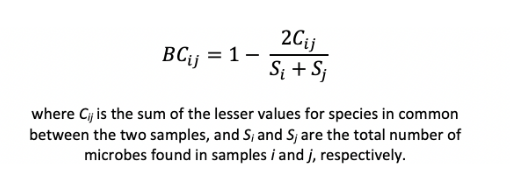

In [19]:
# Initialize our beta matrix! 
matrix_beta = np.zeros((len(list_ValidPoints),len(list_ValidPoints)))
matrix_beta

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
# Start to calculate the values for each pair of field plots! 
for i in list_ValidPoints:
    # Get the count of the no.i plot
    temp_Si = df_field_count.loc[df_field_count['Plot Number'] == i]['Total Count'].dropna().iloc[0]
    # print("Outer loop for plot " + str(i))
    for j in list_ValidPoints:
        # print("Inner loop for plot " + str(j))
        if list_ValidPoints.index(j) > list_ValidPoints.index(i):
            # Get the count of the no.j plot
            temp_Sj = df_field_count.loc[df_field_count['Plot Number'] == j]['Total Count'].iloc[0]
            # Now we need to find the common species among plot i and plot j! 
            temp_Species_i = set(df_field_count.loc[df_field_count['Plot Number'] == i]['Tree Species'])
            temp_Species_j = set(df_field_count.loc[df_field_count['Plot Number'] == j]['Tree Species'])
            temp_Common = temp_Species_i.intersection(temp_Species_j)
            # If there is no common species, then the numerator in the formula is equal to 0. Otherwise we need to calculate it! 
            temp_Cij = 0
            # If there is at least one common species, then we need to find the smaller value in plots i and j. 
            if temp_Common:
                for species in temp_Common:
                    temp_SpeciesCount_i = df_field_count.loc[(df_field_count['Plot Number'] == i) & (df_field_count['Tree Species'] == species)]['Species Counts'].iloc[0]
                    temp_SpeciesCount_j = df_field_count.loc[(df_field_count['Plot Number'] == j) & (df_field_count['Tree Species'] == species)]['Species Counts'].iloc[0]
                    temp_Cij = temp_Cij + min(temp_SpeciesCount_i, temp_SpeciesCount_j)
            temp_Beta = 1 - ((2 * temp_Cij) / (temp_Si + temp_Sj))
            matrix_beta[list_ValidPoints.index(i),list_ValidPoints.index(j)] = temp_Beta
            matrix_beta[list_ValidPoints.index(j),list_ValidPoints.index(i)] = temp_Beta
matrix_beta

array([[0.        , 0.88888889, 1.        , ..., 0.93333333, 0.85714286,
        0.81818182],
       [0.88888889, 0.        , 0.22222222, ..., 0.25      , 0.95652174,
        0.5       ],
       [1.        , 0.22222222, 0.        , ..., 0.45833333, 1.        ,
        0.55      ],
       ...,
       [0.93333333, 0.25      , 0.45833333, ..., 0.        , 0.95      ,
        0.52941176],
       [0.85714286, 0.95652174, 1.        , ..., 0.95      , 0.        ,
        0.75      ],
       [0.81818182, 0.5       , 0.55      , ..., 0.52941176, 0.75      ,
        0.        ]])

In [55]:
df_temp = pd.DataFrame(matrix_beta)
df_temp

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.000000,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,0.600000,0.939394,1.000000,...,0.826087,0.750000,1.000000,1.000000,0.833333,0.913043,1.000000,0.933333,0.857143,0.818182
1,0.888889,0.000000,0.222222,0.428571,0.688889,0.320000,0.581395,0.674419,0.254902,0.702128,...,0.609756,0.380952,0.480519,0.298246,0.629630,0.414634,1.000000,0.250000,0.956522,0.500000
2,1.000000,0.222222,0.000000,0.555556,0.688889,0.200000,0.441860,0.720930,0.450980,0.702128,...,0.658537,0.428571,0.506494,0.403509,0.592593,0.365854,1.000000,0.458333,1.000000,0.550000
3,1.000000,0.428571,0.555556,0.000000,0.777778,0.559322,0.576923,0.769231,0.400000,0.892857,...,0.880000,0.686275,0.581395,0.454545,0.936508,0.800000,1.000000,0.368421,1.000000,0.632653
4,1.000000,0.688889,0.688889,0.777778,0.000000,0.658537,0.882353,0.882353,0.714286,0.736842,...,0.625000,0.575758,0.794118,0.708333,0.777778,0.562500,1.000000,0.692308,1.000000,0.870968
5,1.000000,0.320000,0.200000,0.559322,0.658537,0.000000,0.487179,0.692308,0.531915,0.674419,...,0.621622,0.368421,0.534247,0.471698,0.520000,0.297297,1.000000,0.545455,1.000000,0.555556
6,1.000000,0.581395,0.441860,0.576923,0.882353,0.487179,0.000000,0.687500,0.700000,0.944444,...,0.933333,0.677419,0.878788,0.826087,1.000000,0.800000,1.000000,0.729730,1.000000,0.517241
7,0.600000,0.674419,0.720930,0.769231,0.882353,0.692308,0.687500,0.000000,0.550000,0.666667,...,0.666667,0.419355,0.848485,0.782609,0.720930,0.733333,0.785714,0.675676,0.714286,0.448276
8,0.939394,0.254902,0.450980,0.400000,0.714286,0.531915,0.700000,0.550000,0.000000,0.636364,...,0.526316,0.487179,0.513514,0.333333,0.686275,0.631579,0.833333,0.111111,0.813953,0.405405
9,1.000000,0.702128,0.702128,0.892857,0.736842,0.674419,0.944444,0.666667,0.636364,0.000000,...,0.411765,0.600000,0.828571,0.760000,0.446809,0.647059,0.812500,0.756098,0.384615,0.818182


# Comparison with the indices calculated from satellite images!

In [21]:
df_Alpha = pd.read_csv(cwd_Result + "\\AlphaDiversity.csv").drop(columns=['ID_Plot'])
df_Alpha['Plot Number'] = list_ValidPoints
df_Alpha = df_Alpha.rename(columns = {'Species_Richness': 'Raster Species Richness', 'Shannon': 'Raster Shannon', 'Simpson': 'Raster Simpson'})
df_Alpha

,Raster Species Richness,Fisher,Raster Shannon,Raster Simpson,FRic,FEve,FDiv,Plot Number
0,3.20,0,0.923915,0.55872,0.001167,0.743184,0.643582,1
1,11.95,0,2.330473,0.88992,0.170412,0.814779,0.729240,2
2,6.55,0,1.688379,0.78928,0.007454,0.784609,0.765152,3
3,6.90,0,1.663408,0.76784,0.002104,0.818951,0.704276,4
4,7.80,0,1.902055,0.83376,0.007038,0.867955,0.766910,5
5,7.65,0,1.683240,0.74768,0.002197,0.759749,0.664762,6
6,5.55,0,1.655928,0.80192,0.057603,0.879378,0.786536,7
7,9.70,0,2.051740,0.84960,1.556636,0.696586,0.692729,8
8,10.30,0,2.105882,0.85520,0.405710,0.719563,0.710216,9
9,11.15,0,2.153553,0.85152,0.204428,0.859776,0.807642,10


## Comparison of Species Richness! 

In [22]:
df_Alpha_SpeRichness = df_Alpha[['Raster Species Richness','Plot Number']]
df_Comp_SpeRichness = pd.merge(df_SpRichness,df_Alpha_SpeRichness,on = 'Plot Number')
df_Comp_SpeRichness

,Plot Number,Species Richness,Raster Species Richness
0,1,2,3.20
1,2,5,11.95
2,3,3,6.55
3,4,5,6.90
4,5,5,7.80
5,6,4,7.65
6,7,3,5.55
7,8,4,9.70
8,9,5,10.30
9,10,3,11.15


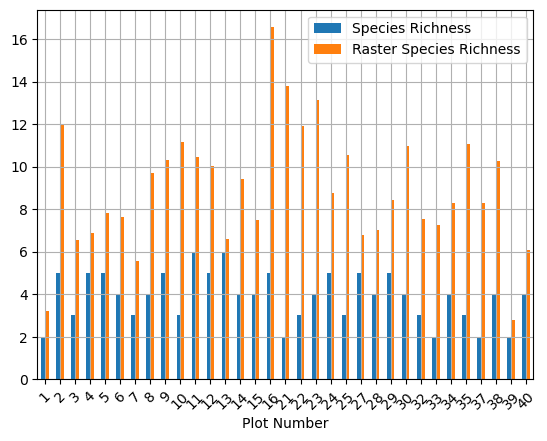

In [23]:
df_Comp_SpeRichness.plot(x = 'Plot Number', y = ['Species Richness', 'Raster Species Richness'], kind = 'bar')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [24]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Comp_SpeRichness['Raster Species Richness'], df_Comp_SpeRichness['Species Richness'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")

9.309790904444402
1.6337838069531315e-13
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!


In [25]:
# Pearson correlation
res = stats.pearsonr(df_Comp_SpeRichness['Raster Species Richness'], df_Comp_SpeRichness['Species Richness'])
res

PearsonRResult(statistic=0.2075402821498198, pvalue=0.24648462854121597)

# Comparison of Alpha - Shannon Index!

In [26]:
df_Alpha_Shannon = df_Alpha[['Raster Shannon','Plot Number']]
df_Comp_Shannon = pd.merge(df_field_shannon_final,df_Alpha_Shannon,on = 'Plot Number')
df_Comp_Shannon

,Plot Number,Total Count,Shannon,Raster Shannon
0,1,9,0.529706,0.923915
1,2,27,1.277259,2.330473
2,3,27,1.086655,1.688379
3,4,36,1.334475,1.663408
4,5,18,1.365077,1.902055
5,6,23,1.187775,1.683240
6,7,16,0.984087,1.655928
7,8,16,1.263741,2.051740
8,9,24,1.212466,2.105882
9,10,20,0.790987,2.153553


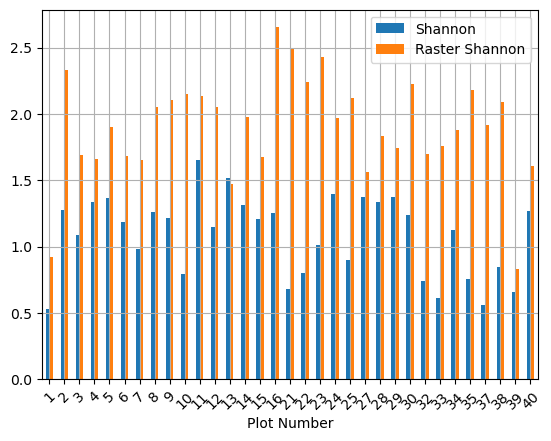

In [27]:
df_Comp_Shannon.plot(x = 'Plot Number', y = ['Shannon', 'Raster Shannon'], kind = 'bar')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [28]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Comp_Shannon['Raster Shannon'], df_Comp_Shannon['Shannon'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon and Raster Shannon!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")

9.536499534606785
6.613464749375937e-14
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon and Raster Shannon!


In [29]:
# Pearson correlation
res = stats.pearsonr(df_Comp_Shannon['Raster Shannon'], df_Comp_Shannon['Shannon'])
res

PearsonRResult(statistic=0.13547423433780234, pvalue=0.45222647813583894)

## Comparison of Alpha - Simpson! 

In [30]:
df_Alpha_Simpson = df_Alpha[['Raster Simpson','Plot Number']]
df_Comp_Simpson = pd.merge(df_field_simpson_final,df_Alpha_Simpson,on = 'Plot Number')
df_Comp_Simpson

,Plot Number,Species Counts,Simpson,Raster Simpson
0,1,9,0.345679,0.55872
1,2,27,0.677641,0.88992
2,3,27,0.658436,0.78928
3,4,36,0.686728,0.76784
4,5,18,0.697531,0.83376
5,6,23,0.642722,0.74768
6,7,16,0.585938,0.80192
7,8,16,0.703125,0.84960
8,9,24,0.607639,0.85520
9,10,20,0.485000,0.85152


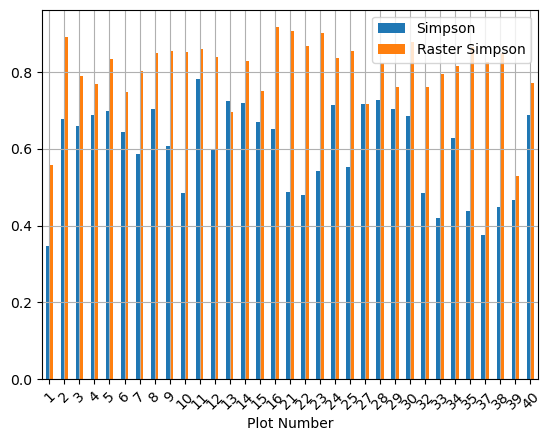

In [31]:
df_Comp_Simpson.plot(x = 'Plot Number', y = ['Simpson', 'Raster Simpson'], kind = 'bar')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [32]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Comp_Simpson['Raster Simpson'], df_Comp_Simpson['Simpson'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")

8.054467436767817
2.5843374598927742e-11
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!


In [33]:
# Pearson correlation
res = stats.pearsonr(df_Comp_Simpson['Raster Simpson'], df_Comp_Simpson['Simpson'])
res

PearsonRResult(statistic=0.1751009203878889, pvalue=0.3297335889332814)

## Comparison of Bray-Curtis Beta Diversity! 

In [34]:
df_Beta = pd.read_csv(cwd_Result + "\\BrayCurtis.csv", header = 0, index_col = 0)
df_Beta

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
1,0.000,1.000,1.000,1.000,0.996,0.926,0.594,0.984,0.964,0.992,...,1.000,1.000,0.784,0.986,0.858,0.746,1.000,0.892,0.148,1.000
2,1.000,0.000,0.728,0.454,0.606,0.790,0.958,0.562,0.554,0.624,...,0.460,0.458,0.930,0.682,0.838,0.870,0.858,0.788,1.000,0.644
3,1.000,0.728,0.000,0.760,0.974,0.996,1.000,0.986,0.948,0.842,...,0.774,0.616,1.000,0.970,0.986,1.000,0.634,1.000,1.000,0.986
4,1.000,0.454,0.760,0.000,0.678,0.856,0.980,0.702,0.636,0.662,...,0.406,0.548,0.970,0.714,0.862,0.936,0.900,0.888,1.000,0.694
5,0.996,0.606,0.974,0.678,0.000,0.460,0.654,0.460,0.368,0.600,...,0.762,0.604,0.692,0.314,0.554,0.662,0.974,0.448,0.976,0.402
6,0.926,0.790,0.996,0.856,0.460,0.000,0.458,0.688,0.628,0.682,...,0.866,0.806,0.542,0.520,0.528,0.512,0.990,0.316,0.906,0.766
7,0.594,0.958,1.000,0.980,0.654,0.458,0.000,0.916,0.774,0.754,...,0.998,0.952,0.362,0.646,0.444,0.392,1.000,0.464,0.564,0.930
8,0.984,0.562,0.986,0.702,0.460,0.688,0.916,0.000,0.442,0.750,...,0.700,0.598,0.856,0.558,0.816,0.758,0.972,0.624,1.000,0.472
9,0.964,0.554,0.948,0.636,0.368,0.628,0.774,0.442,0.000,0.672,...,0.676,0.602,0.724,0.350,0.684,0.682,0.996,0.546,0.976,0.490
10,0.992,0.624,0.842,0.662,0.600,0.682,0.754,0.750,0.672,0.000,...,0.744,0.616,0.700,0.628,0.460,0.698,0.820,0.664,0.954,0.596


In [46]:
arr_Beta_Raster = np.triu(df_Beta.to_numpy()).reshape(-1)
arr_Beta_Raster = arr_Beta_Raster[~np.isnan(arr_Beta_Raster)]
arr_Beta_Raster = arr_Beta_Raster[arr_Beta_Raster != 0]
len(arr_Beta_Raster)
arr_Beta_Raster

array([1.   , 1.   , 1.   , 0.996, 0.926, 0.594, 0.984, 0.964, 0.992,
       0.922, 1.   , 0.978, 0.998, 0.728, 0.992, 0.994, 1.   , 0.952,
       1.   , 0.63 , 1.   , 0.566, 1.   , 1.   , 0.784, 0.986, 0.858,
       0.746, 1.   , 0.892, 0.148, 1.   , 0.728, 0.454, 0.606, 0.79 ,
       0.958, 0.562, 0.554, 0.624, 0.804, 0.788, 0.868, 0.432, 0.934,
       0.458, 0.616, 0.638, 0.438, 0.678, 0.866, 0.512, 0.966, 0.46 ,
       0.458, 0.93 , 0.682, 0.838, 0.87 , 0.858, 0.788, 1.   , 0.644,
       0.76 , 0.974, 0.996, 1.   , 0.986, 0.948, 0.842, 0.948, 0.546,
       1.   , 0.846, 1.   , 0.708, 0.794, 0.692, 0.718, 0.804, 1.   ,
       0.802, 1.   , 0.774, 0.616, 1.   , 0.97 , 0.986, 1.   , 0.634,
       1.   , 1.   , 0.986, 0.678, 0.856, 0.98 , 0.702, 0.636, 0.662,
       0.86 , 0.902, 0.958, 0.492, 0.986, 0.626, 0.732, 0.772, 0.636,
       0.726, 0.928, 0.264, 1.   , 0.406, 0.548, 0.97 , 0.714, 0.862,
       0.936, 0.9  , 0.888, 1.   , 0.694, 0.46 , 0.654, 0.46 , 0.368,
       0.6  , 0.608,

In [47]:
arr_Beta_Field = np.triu(matrix_beta).reshape(-1)
arr_Beta_Field = arr_Beta_Field[~np.isnan(arr_Beta_Field)]
arr_Beta_Field = arr_Beta_Field[arr_Beta_Field != 0]
len(arr_Beta_Field)
arr_Beta_Field

array([0.88888889, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.6       , 0.93939394, 1.        , 0.69230769,
       0.90909091, 1.        , 1.        , 1.        , 0.89189189,
       0.85714286, 0.83333333, 0.92857143, 0.91304348, 1.        ,
       0.94285714, 0.57575758, 0.82608696, 0.75      , 1.        ,
       1.        , 0.83333333, 0.91304348, 1.        , 0.93333333,
       0.85714286, 0.81818182, 0.22222222, 0.42857143, 0.68888889,
       0.32      , 0.58139535, 0.6744186 , 0.25490196, 0.70212766,
       0.77272727, 0.61290323, 0.63265306, 0.83783784, 0.29824561,
       0.30909091, 0.95652174, 0.95238095, 0.52173913, 0.6097561 ,
       0.36      , 0.58490566, 0.52941176, 0.6097561 , 0.38095238,
       0.48051948, 0.29824561, 0.62962963, 0.41463415, 1.        ,
       0.25      , 0.95652174, 0.5       , 0.55555556, 0.68888889,
       0.2       , 0.44186047, 0.72093023, 0.45098039, 0.70212766,
       0.86363636, 0.61290323, 0.63265306, 0.83783784, 0.26315

In [50]:
df_Comp_Beta = pd.DataFrame(
    data = {
        'Index': np.array(range(0,len(arr_Beta_Field))),
        'Beta': arr_Beta_Field,
        'Raster Beta': arr_Beta_Raster
    }
)
df_Comp_Beta


,Index,Beta,Raster Beta
0,0,0.888889,1.000
1,1,1.000000,1.000
2,2,1.000000,1.000
3,3,1.000000,0.996
4,4,1.000000,0.926
...,...,...,...
523,523,0.806452,1.000
524,524,0.840000,0.874
525,525,0.950000,0.906
526,526,0.529412,0.738


In [51]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(arr_Beta_Raster, arr_Beta_Field)
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Bray-Curtis Dissimilarity and Raster one!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")

5.561887283687738
3.38214979503284e-08
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Bray-Curtis Dissimilarity and Raster one!


In [52]:
# Pearson correlation
res = stats.pearsonr(arr_Beta_Raster, arr_Beta_Field)
res

PearsonRResult(statistic=0.17341208865486246, pvalue=6.184712987041135e-05)

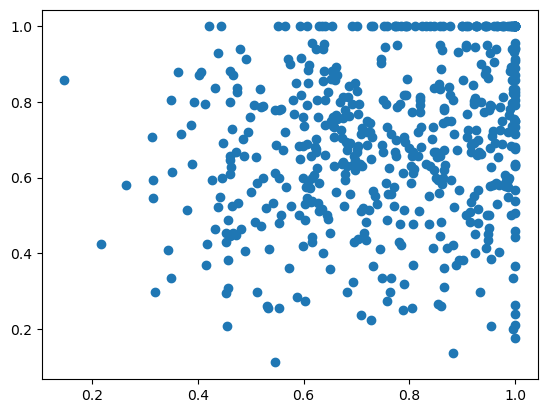

In [53]:
plt.scatter(arr_Beta_Raster, arr_Beta_Field)